In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
import random

## Stochastic Gradient Descent for Linear Regression

Given a set of height and weight data points, our goal will be to fit a linear model $y = mx+b$ to the model by minimizing the L2 error, where $m$ and $b$ are variables in our optimization problem. We will solve this problem (also need the gradient of the cost function)
$$ \min_{m, b} \left[J(m,b) =  \frac{1}{n}\sum_{i=1}^n \lvert\lvert y_i - (mx_i + b) \rvert\rvert_2^2 \right] $$

We want to solve this with 3 methods: 
1. Steepest Descent 
2. Stochastic descent
3. Batch stochastic descent

The gradient of the cost $ J(m,b)$ is given as $\nabla J_m = \frac{-2}{n} \sum_{i=1}^n x_i(y_i - (mx_i + b))$ and $\nabla J_b = \frac{-2}{n} \sum_{i=1}^n (y_i - (mx_i + b))$ and to solve this, we must takes steps in the direction defined by the negative gradient.

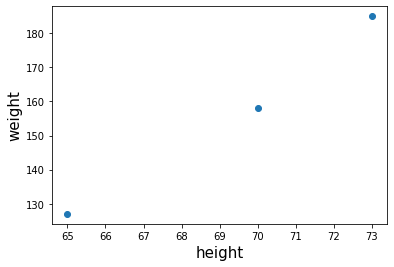

In [11]:
# We begin by defining our data
h = np.array([65.0, 70.0, 73.0]) # height in inches
w = np.array([127.0, 158.0, 185.0]) # weight in pounds

plt.plot(h, w, 'o')
plt.xlabel('height', fontsize=15)
plt.ylabel('weight', fontsize=15)
plt.savefig('hw_data')

In [29]:
# this takes a while to evaluate, about 2 minutes because we need many iterations
# Initial guesses for our parameters
m = 5.0
b = -100.0
n = len(h) 

l = 0.0002  # The learning rate, this has been tuned a bit
epochs = int(1e7)

# Perform gradient descent 
for i in range(epochs): 
    w_current = m*h + b  
    # Now we evaluate the gradients
    GradJ_m = (-2/n) * np.sum(h * (w - w_current))  
    GradJ_b = (-2/n) * np.sum(w - w_current)
    # Now take a step in the direction defined by the negative gradient
    m = m - l * GradJ_m  
    b = b - l * GradJ_b  
    
print (m, b)

7.142449411804579 -338.5430951970544


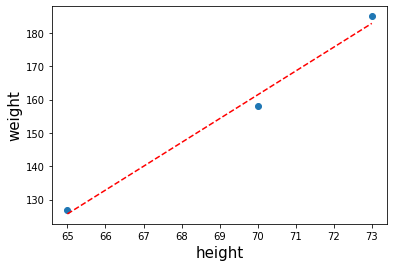

In [33]:
# This method gets close to the optimal solution, but it takes a long time. Might need to regularize
plt.plot(h, w, 'o')
plt.xlabel('height', fontsize=15)
plt.ylabel('weight', fontsize=15)
plt.plot(h, m*h + b, 'r--')
# True values: 7.142791202683418 and b =  -338.5668463655438
plt.savefig('gd_fit')

In [20]:
def gradient_descent(m_init, b_init, h, w, epochs, learn_rate, method='deterministic'):
    '''Implements 3 variants of gradient descent. Regular or deterministic, stochastic, and 
    batch-stochastic. Function requires intial data, guesses for parameters, epochs, and learning rate.'''
    n = len(h) 
    m = m_init
    b = b_init
    objective = np.zeros((int(epochs),))
    iterates = np.zeros((int(epochs), 2))

    if method=='deterministic':
        # Perform gradient descent 
        for i in range(int(epochs)): 
            w_current = m*h + b  
            # Now we evaluate the gradients
            GradJ_m = (-2/n) * np.sum(h * (w - w_current))  
            GradJ_b = (-2/n) * np.sum(w - w_current)
            objective[i] = (1/n) * np.sum((w - w_current)**2)
            # Now take a step in the direction defined by the negative gradient
            m = m - l * GradJ_m; iterates[i,0] = m  
            b = b - l * GradJ_b; iterates[i,1] = b  
            
    if method=='stochastic':
        for i in range(int(epochs)): 
            w_current = m*h + b  
            # Now we evaluate the gradients at some random index
            j = random.randint(0,n-1) #randomly defined index
            GradJ_m = -2 * h[j] * (w[j] - w_current[j]) 
            GradJ_b = -2 * (w[j] - w_current[j])
            objective[i] = (1/n) * np.sum((w - w_current)**2)
            # Now take a step in the direction defined by the negative gradient for a random data point
            m = m - l * GradJ_m; iterates[i,0] = m
            b = b - l * GradJ_b; iterates[i,1] = b
            
    if method=='batch-stochastic':
        for i in range(int(epochs)): 
            w_current = m*h + b  
            # Now we evaluate the gradients at some random index
            j = random.sample(range(0, n), n-1) #randomly choose a subset of data points
            GradJ_m = -(2/(n-1)) * np.sum(h[j] * (w[j] - w_current[j])) 
            GradJ_b = -(2/(n-1)) * np.sum(w[j] - w_current[j])
            objective[i] = (1/n) * np.sum((w - w_current)**2)
            # Now take a step in the direction defined by the negative gradient for a random data point
            m = m - l * GradJ_m; iterates[i,0] = m
            b = b - l * GradJ_b; iterates[i,1] = b
        
     
    return m, b, objective, iterates

## Let's test GD against SGD and batch-SGD with the same initial guesses, learning rate, and epochs. We check which achieves the lowest objective value and which is the fastest. 

minimizer: m =  7.142791202683418 and b =  -338.5668463655438 with objective =  6.000000047453384
CPU times: user 3min 49s, sys: 1.27 s, total: 3min 50s
Wall time: 3min 53s


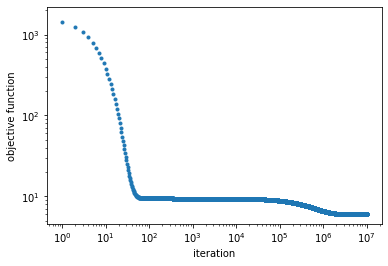

In [31]:
%%time 
# regular GD
m, b, objective, iterates = gradient_descent(6.0, -300.0, h, w, 1e7, .0002, method='deterministic')
plt.loglog(objective, '.')
plt.xlabel('iteration'); plt.ylabel('objective function')
min_idx = np.argmin(objective)
print('minimizer: m = ',iterates[min_idx,0], 'and b = ',iterates[min_idx,1], 'with objective = ',objective[min_idx])
plt.savefig('gd_objective',dpi=200)

minimizer: m =  5.684530437828261 and b =  -242.541432546225 with objective =  26.842118155136788
CPU times: user 16.6 s, sys: 129 ms, total: 16.8 s
Wall time: 17 s


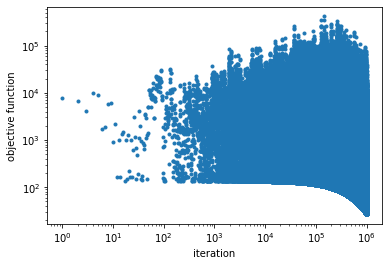

In [26]:
%%time 
# Stochastic GD
m, b, objective, iterates = gradient_descent(5.0, -100.0, h, w, 1e6, .0002, method='stochastic')
plt.loglog(objective, '.')
plt.xlabel('iteration'); plt.ylabel('objective function')
min_idx = np.argmin(objective)
print('minimizer: m = ',iterates[min_idx,0], 'and b = ',iterates[min_idx,1], 'with objective = ',objective[min_idx])
plt.savefig('sgd_objective',dpi=200)

minimizer: m =  5.790147865988399 and b =  -241.92464738378465 with objective =  27.109981294069947
CPU times: user 37.6 s, sys: 187 ms, total: 37.8 s
Wall time: 38 s


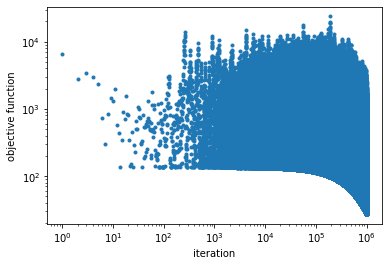

In [28]:
%%time 
# Batch SGD
m, b, objective, iterates = gradient_descent(5.0, -100.0, h, w, 1e6, .0002, method='batch-stochastic')
plt.loglog(objective, '.')
plt.xlabel('iteration'); plt.ylabel('objective function')
min_idx = np.argmin(objective)
print('minimizer: m = ',iterates[min_idx,0], 'and b = ',iterates[min_idx,1], 'with objective = ',objective[min_idx])
plt.savefig('bsgd_objective',dpi=200)

## They all are a similar speed because we only have 3 data points, but SGD is the fastest and is even competitive in terms of the final objective function value. 

## For better convergence results, each algorithm needs more iteration time and/or a higher learning rate. 